## Rotations

We revisit our work on 2D rotations and cast them as matrix exponentials of a skew matrix. We then see that 3D rotations about an axis, $a$, are exponentials of the cross product matrix associated with $a$. We then, in preparation for upcoming notebooks on 3D Kinematics, Computer Vision and Quantum Computation, establish the Euler Product Formula, construct frame transformations, and close with the $RQ$ factorization.

### 2D Rotations

To prepare for rotations in space we consider the planar rotations from a more *analytical* viewpoint. By *analytical* I mean derivatives and Taylor series of the $\exp$ function and its two offspring, $\cos$ and $\sin$. In particular, with reference to Figure \ref{fig:rot2}, we observe that

\begin{equation} \label{eq:xycirc}
  x_0(\theta) = r\cos(\theta), \\
  x_1(\theta) = r\sin(\theta)
\end{equation}

traces out a circle of radius $r$ in the $(x_0,x_1)$ plane as $\theta$ travels from 0 to $2\pi$. On differentiating this pair with respect to $\theta$ we arrive at the tangent vector with components

\begin{equation} \label{eq:circtan}
  x'_0(\theta) = -r\sin(\theta), \\
  x'_1(\theta) = r\cos(\theta)
\end{equation}

This vector is most naturally illustrated when translated to the point at which it is tangent.

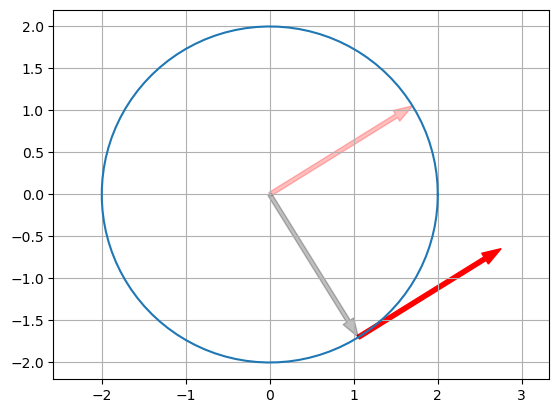

In [1]:
# planar rotation with tangent
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

theta = np.linspace(0, 2*np.pi,100)
r = 2

x0 = r*np.cos(theta)
x1 = r*np.sin(theta)
plt.plot(x0, x1)

dx0 = -r*np.sin(theta)
dx1 = r*np.cos(theta)

m = np.random.randint(100)  

plt.arrow(x0[m], x1[m], dx0[m], dx1[m], width=0.05, color='r', length_includes_head=True)
plt.arrow(0, 0, dx0[m], dx1[m], width=0.05, color='r', alpha=0.25, length_includes_head=True)
plt.arrow(0, 0, x0[m], x1[m], width=0.05, color='k', alpha=0.25, length_includes_head=True)
plt.grid('on')
plt.axis('equal')
plt.show()

\begin{myfig}\label{fig:rot2} At a random point, $x$ in gray, on the blue circle we graph the tangent vector, $x'$, in light red, and it's parallel translate in dark red. Rerun to see new tangent.\end{myfig}

\begin{exercise}\label{ex:gtan}
Regarding (\ref{eq:xycirc}) and (\ref{eq:circtan}), please confirm that $\|x(\theta)\|=r$, and $\|x'(\theta)\|=r$ and $x^T(\theta)x'(\theta)=0$ for each $0\le\theta <2\pi$.
\end{exercise}

This exercise and Figure \ref{fig:rot2} indicate that $x'$ is simply rotation of $x$ by $\pi/2$, i.e.,

\begin{equation}\label{eq:rot2b}
  x'(\theta) = Sx(\theta), \where S = \begin{bmatrix} 0 & -1 \\ 1 & 0 \end{bmatrix}
\end{equation}

We solve this differential equation by analogy with the scalar case. In particular, as the solution to $y'(t)=5y(t)$ is $y(t)=\exp(5t)y(0)$, we expect the solution of (\ref{eq:rot2b}) to be

\begin{equation}\label{eq:rot2c}
  x(\theta) = \exp(\theta S)x(0)
\end{equation}

where, on recalling the Taylor series for $\exp$, 

\begin{equation}\label{eq:TayExp}
   \exp(\theta S) = I + \theta S + (\theta S)^2/2! + (\theta S)^3/3! + (\theta S)^4/4! + (\theta S)^5/5! + \cdots
\end{equation}

where $I$ is the 2-by-2 identity matrix. This looks complicated, until you realize that $S^2=-I$.

\begin{exercise}\label{ex:S2pow}
Please show that
\begin{equation*}
  S^{2m-1} = (-1)^{m+1}S  \and S^{2m} = (-1)^mI \hskip 0.25in m=1,2,\ldots
\end{equation*}
and deduce, on recalling the Taylor series for $\sin$ and $\cos$,  that
\begin{equation*}
  \eqalign{
   \exp(\theta S) &= I + \theta S - \theta^2 I/2! - \theta^3 S/3! + \theta^4 I/4! + \theta^5 S/5! + \cdots \cr
      &= (1 - \theta^2/2! + \theta^4/4! - \cdots)I + (\theta - \theta^3/3! + \theta^5/5! - \cdots)S \cr
      &= \cos(\theta)I + \sin(\theta)S \cr
      &= K(\theta) \hskip{0.25in}\hbox{from our previous notebook.}\cr}
\end{equation*}
\end{exercise}

To **recap**, our return to planar rotations has revealed that 

\begin{equation}\label{eq:expS2}
  \boxed{K(\theta)=\exp(\theta S)}
\end{equation}

where $S$ is the matrix that transforms points to tangents along the circle of rotation. 

### 3D Rotations

We extend the reasoning of the last section and search for the matrix that transforms points to tangents along the circle of rotation. Given a unit vector $a\in\maR^3$ and vector $x\in\maR^3$ we illustrate in Figure \ref{fig:3drot} the counterclockwise rotation of $x$ about $a$ by angle $\theta$, together with its translated tangent vector.

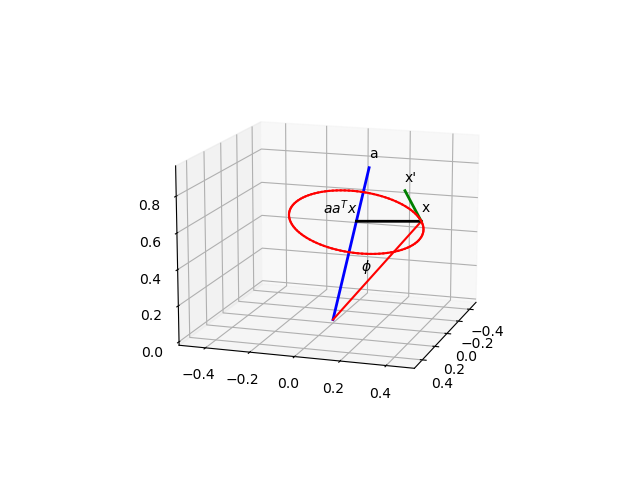

In [62]:
# an illustration of rotation about an axis
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(' ')
ax = plt.axes(projection="3d")    # set up for 3D work
ax.view_init(elev = 14, azim = 18)

a = np.array([1,1,4])/np.sqrt(18)   # make a unit vector
A = np.outer(a,a)
I = np.eye(3)
X = np.array([[0, -a[2], a[1]],[a[2], 0, -a[0]], [-a[1], a[0], 0]])   # the cross product matrix

ax.plot3D([0, a[0]], [0, a[1]], [0, a[2]],'b',linewidth=2)   # plot the a vector
ax.text3D(a[0], a[1], a[2]+0.05, 'a')                             # label the a vector

x = np.array([0,2,3])/5
ax.plot3D([0, x[0]], [0, x[1]], [0, x[2]],'r')   # plot the x vector
ax.text3D(x[0], x[1], x[2]+.05, 'x')                             # label the x vector

Ax = A@x
ax.plot3D([Ax[0], x[0]], [Ax[1], x[1]], [Ax[2], x[2]], 'k',linewidth=2)   # plot the A*x vector
ax.text3D(Ax[0], Ax[1]-.15, Ax[2]+0.025, '$aa^Tx$')   # label the A*x vector

dx = np.cross(a, x)
ax.plot3D([x[0], x[0]+dx[0]], [x[1], x[1]+dx[1]], [x[2], x[2]+dx[2]], 'g',linewidth=2)   # plot the dx vector
#ax.arrow3D(x[0], x[1], x[2], dx[0], dx[1], dx[2], width=0.05, color='g', length_includes_head=True)   # plot the dx vector
ax.text3D(x[0]+dx[0], x[1]+dx[1], x[2]+dx[2]+0.05, "x'")   # label the dx vector

p = (Ax + x)/4
ax.text3D(p[0], p[1], p[2], '$\phi$')   # label phi

Theta = np.linspace(0,2*np.pi,100)

y = x  # temp storage

for theta in Theta:
    K = A + np.sin(theta)*X + np.cos(theta)*(I-A)    # the rotation matrix
    newy = K@x
    ax.plot3D([y[0], newy[0]], [y[1], newy[1]], [y[2], newy[2]],'r')   # connect old to new
    y = newy

ax.grid('on')
ax.set_xlim(-.5, .5)
ax.set_ylim(-.5, .5);

\begin{myfig}\label{fig:3drot} An axis defined by a blue unit vector, $a$. We choose a red vector $x$ that makes the angle $\phi$ with $a$. We rotate $x$ about $a$ and trace out the red circle centered at $aa^Tx$ (the projection of $x$ onto $a$).
At $x$ we also plot the black normal (radial) vector to the circle and the green tangent vector, $x'$. \end{myfig}

We learn from this figure that the tangent vector, $x'$, is perpendicular to the plane spanned by $a$ and $x$, that $\{a,x,x'\}$ obey the right-hand-rule, and that $\|x'\|=\|x\|\sin(\phi)$. As such, the tangent vector at $x$ is the cross product of $a$ and $x$. That is,

\begin{equation} \label{eq:oderot}
  x'(\theta) = a\times x = X(a)x
\end{equation}

and **so $X(a)$ is the matrix that transforms points to tangents during a rotation.** Based on (\ref{eq:expS2}) we therefore expect the associated rotation matrix to be

\begin{equation*}
  K(a,\theta) \equiv \exp(\theta X(a)) = I + \theta X(a) + (\theta X(a))^2/2 + (\theta X(a))^3/3! + (\theta X(a))^4/4! + \cdots
\end{equation*}

Now, thanks to our work in our previous notebook we know that powers of $X(a)$ divide neatly between even and odd that, as in Exercise \ref{ex:S2pow}, reveal $\sin(\theta)$ and $\cos(\theta)$.

\begin{exercise}\label{ex:expXa}
Please show that
\begin{equation*}
  X(a)^{2m-1} = (-1)^{m+1}X(a) \and X(a)^{2m} = (-1)^m(I - aa^T) \hskip 0.25in m=1,2,\ldots
\end{equation*}
and so
\begin{equation*}
  K(a,\theta) = \exp(\theta X(a)) 
  = I + \sin(\theta)X(a) + (\cos(\theta)-1)(I-aa^T) 
  = aa^T + \sin(\theta)X(a) + \cos(\theta)(I-aa^T)
\end{equation*}
\end{exercise}

This deserves a box. The counterclockwise rotation by $\theta$ about the unit-length axis $a\in\maR^3$ is

\begin{equation}\label{eq:Kat}
  \boxed{K(a,\theta) = aa^T + \sin(\theta)X(a) + \cos(\theta)(I-aa^T)}
\end{equation}

Looking back at Figure \ref{fig:3drot} we recognize $(\sin(\theta)X(a) + \cos(\theta)(I-aa^T))p$ as 2 dimensional rotation of $p$ in the plane perpendicular to $a$ while $aa^Tp$ simply translates $p$ up the $a$ axis. This becomes even easier to see when $a$ is one of the coordinate axes

\begin{equation}\label{eq:eCart}
 e_x = \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix}, \hskip 0.25in
 e_y = \begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix}, \hskip 0.25in
 e_z = \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}
\end{equation}

\begin{exercise}\label{ex:Rot3euc}
Please confirm that

\begin{equation}\label{eq:Kax}
 K(e_x,\theta) = \begin{bmatrix} 
       1 & 0 & 0 \\ 0 & \cos(\theta) & -\sin(\theta) \\  0 & \sin(\theta) & \cos(\theta)\end{bmatrix}, \hskip 0.25in
 K(e_y,\theta) = \begin{bmatrix} 
         \cos(\theta) & 0 & \sin(\theta) \\  0 & 1 & 0 \\ -\sin(\theta) & 0 & \cos(\theta)\end{bmatrix}, \hskip 0.25in
 K(e_z,\theta) = \begin{bmatrix} 
       \cos(\theta) & -\sin(\theta) & 0 \\ \sin(\theta) & \cos(\theta) & 0 \\ 0 & 0 & 1 \end{bmatrix}
\end{equation}

and in each case show that its determinant, via $\det([u,v,w])=w^T(u\times v)$, is 1 and its trace is $1+2\cos\theta$.

\end{exercise}

These coordinate rotations, (\ref{eq:Kax}), indeed have the look of the planar rotations of our previous notebook. Let's now show that $K(a,\theta)$ indeed leaves $a$ unmolested, that its transpose reverses the rotation, that composite rotations correspond to sums of angles,
and that it preserves length (norm) and angle (with respect to $a$).

\begin{exercise}\label{ex:Rot3a}
Use (\ref{eq:Kat}) and properties of $X(a)$ to conclude, via direct confirmation, that 

(i) $K(a,\theta)a = a$

(ii) $K(a,\theta)^T = K(a,-\theta)$

(iii) $K(a,\theta)K(a,\phi)=K(a,\theta+\phi)$

(iv) $\|K(a,\theta)x\| = \|x\|$, for each $x\in\maR^3$ and $\theta\in(0,2\pi)$.

(v) $\angle(a,x)=\angle(a,K(a,\theta)x)$, for each $x\in\maR^3$ and $\theta\in(0,2\pi)$.

(vi) $K'(a,\theta)=X(a)K(a,\theta)$ where prime, as above, denotes $d/d\theta$.

(vii) $\tr(K(a,\theta))=1+2\cos(\theta)$
\end{exercise}

### The Euler Product Formula

As a consequence of part (ii) of the previous exercise we learn that $K(a,\theta)^TK(a,\theta)=I$. When we write this matrix product as a collection of nine inner products of rows and columns of $K(a,\theta)$ we see that each of the columns of $K(a,\theta)$ are unit vectors and that they are pairwise perpendicular to one another - and that all this holds true for their rows as well. We call such a matrix **orthogonal.** Please confirm that if $U$ and $V$ are orthogonal matrices then so to is $UV$. This justifies the naming in 

\begin{definition}\label{def:O3}
The set of matrices $U\in\maM_3(\maR)$ for which $U^TU=I$ is called the **orthogonal group** and is denoted $\O_3(\maR)$.
\end{definition}

Though the determinant of $K(a,\theta)$ may also be evaluated from scratch it is very tedious and far from illuminating. We will instead deduce it from the

\begin{proposition}\label{prop:EPF} **Euler Product Formula.** Given a unit vector $a\in\maR^3$ and angle $\theta$ there exist angles $\alpha$, $\beta$, and $\gamma$ such that

\begin{equation}\label{eq:EPF}
  K(a,\theta) = K(e_x,\gamma)K(e_z,\beta)K(e_x,\alpha)
\end{equation}

\end{proposition}

**Proof:** We show, by judicious creation of zeros, how to choose $\alpha$ and $\beta$ so that $K(a,\theta)K(e_x,\alpha)K(e_z,\beta)$ becomes rotation about $e_x$. To begin, set $A=K(a,\theta)$ and 

\begin{equation}\label{eq:epf1}
 B\equiv AK(e_x,\alpha) = 
  \begin{bmatrix} a_{0,0} & a_{0,1} & a_{0,2} \\ a_{1,0} & a_{1,1} & a_{1,2} \\ a_{2,0} & a_{2,1} & a_{2,2} \end{bmatrix}
  \begin{bmatrix} 1 & 0 & 0 \\ 0 & \cos(\alpha) & -\sin(\alpha) \\  0 & \sin(\alpha) & \cos(\alpha)\end{bmatrix} 
   = \begin{bmatrix} b_{0,0} & b_{0,1} & -a_{0,1}\sin(\alpha)+a_{0,2}\cos(\alpha) \\ b_{1,0} & b_{1,1} & b_{1,2} \\ 
                                          b_{2,0} & b_{2,1} & b_{2,2} \end{bmatrix}
\end{equation}

We choose $\alpha$ such that $b_{0,2}=0$ and proceed to

\begin{equation}\label{eq:epf2}
 C\equiv BK(e_z,\beta) = 
  \begin{bmatrix} b_{0,0} & b_{0,1} & 0 \\ b_{1,0} & b_{1,1} & b_{1,2} \\ 
                                          b_{2,0} & b_{2,1} & b_{2,2} \end{bmatrix}
  \begin{bmatrix} 
       \cos(\beta) & -\sin(\beta) & 0 \\ \sin(\beta) & \cos(\beta) & 0 \\ 0 & 0 & 1 \end{bmatrix} 
   = \begin{bmatrix} c_{0,0} & -b_{0,0}\sin(\beta)+b_{0,1}\cos(\beta) & 0 \\ c_{1,0} & c_{1,1} & c_{1,2} \\ 
                                          c_{2,0} & c_{2,1} & c_{2,2} \end{bmatrix}
\end{equation}

We choose $\beta$ to make $c_{0,1}=0$ and note that as $C$ is a product of orthogonal matrices then it too is orthogonal. As such, its top row is a unit vector and so $c_{0,0}^2=1$. If $c_{0,0}=-1$ then we can make it one by replacing $\beta$ with $\beta+\pi$. Now, with $c_{0,0}=1$, the first column can be a unit vector only when $c_{1,0}=c_{2,0}=0$ and so

\begin{equation}\label{eq:epf3}
 C= K(a,\theta)K(e_x,\alpha)K(e_z,\beta) 
   = \begin{bmatrix} 1 & 0 & 0 \\ 0 & c_{1,1} & c_{1,2} \\ 0 & c_{2,1} & c_{2,2} \end{bmatrix}
\end{equation}

As the 2nd column is a unit vector it follows that $c_{1,1}^2+c_{2,1}^2=1$ and so $c_{1,1}=\cos(\gamma)$ and
$c_{2,1}=\sin(\gamma)$ for some $\gamma$. As the third column must be a unit vector perpendicular to the 2nd column we find $c_{1,2}=-\sin(\gamma)$ and $c_{2,2}=\cos(\gamma)$ and so $K(a,\theta)K(e_x,\alpha)K(e_z,\beta)=K(e_x,\gamma)$. Peeling off the multipliers we find  $A=K(e_x,\gamma)K(e_z,-\beta)K(e_x,-\alpha)$. **End of Proof.**

This together with the fact proved in our previous notebook that determinants of products are products of determinants reveals

\begin{corollary}\label{cor:EPFd} 
 $\det(K(a,\theta))=1$. 
\end{corollary}

\begin{corollary}\label{cor:EPFd2} 
The matrices in $\O_3(\maR)$ whose determinant is one constitute a subgroup of $\O_3(\maR)$ called the **Special Orthogonal Group** and is denoted $\SO_3(\maR)$.
\end{corollary}

We have seen that every rotation is a special orthogonal matrix. Regarding the converse statement we first show that special orthogonal matrices have axes and angles.

\begin{proposition}\label{prop:Orotp}
If $U\in\SO_3(\maR)$ then there is a nonzero $a\in\maR^3$ such that $Ua=a$ and an angle $\theta\in [0,2\pi)$ such that $\tr(U)=1+2\cos(\theta)$.
\end{proposition}

**Proof:** The eigenvalues of $U$ are roots of a cubic and so are potentially complex. As the cubic is real we know that complex roots must occur in conjugate pairs. If $\la$ is an eigenvalue of $U$ with eigenvector $q$ then $Uq=\la q$. If $\la$ is complex then so too must be $q$. If we denote the complex conjugate of $\la$ by $\ov\la$ then $|\la|^2=\ov\la\la$ and $\|q\|^2=\ov q^Tq$. Taking norms on both sides of $Uq=\la q$ reveals $\|Uq\|^2=|\la|^2\|q\|^2$. As
$\|Uq\|^2=(U\ov q)^TUq=\ov q^TU^TUq=\ov q^Tq$ we find each eigenvalue must have magnitude 1 and so $\la=\cos(\theta)+i\sin(\theta)$ for some real $\theta$.
There are only two possible cases:

(i) $U$ has complex eigenvalues, $\la$ and $\ov\la$, and a real eigenvalue $r$. As $\la\ov\la=1$ and the determinant of $U$ is the product of its eigenvalues we find $\det(U)=r$. But $U\in\SO_3(\maR)$ implies $\det(U)=1$ so $r=1$. In this case
$\tr(U)=1+2\cos(\theta)$.

(ii) If $U$ has three real eigenvalues then, as their magnitudes are 1, they must each be $\pm 1$. As their product is 1 we see that the only possibilities are $\{1,1,1\}$ and $\{-1,-1,1\}$. The trace in each case becomes $\tr(U)=3=1+2\cos(0)$ and
$\tr(U)=-1=1+2\cos(\pi)$ respectively.

In each we have shown that $U$ has an eigenvalue equal to 1 (and so an eigenvector $a$ obeying $Ua=a$) and an angle $\theta$ for which $\tr(U)=1+2\cos(\theta)$. **End of Proof.**

We follow-up this existence with an explicit construction of the axis and angle

\begin{proposition}\label{prop:Orot}
If $U\in\SO_3(\maR)$ then $U=K(a,\theta)$ where the angle and axis are determined by

\begin{equation}\label{eq:Orot}
  \cos(\theta)=(\tr(U)-1)/2 \and 
  a = \frac{1}{2\sin(\theta)}\begin{bmatrix} u_{2,1}-u_{1,2} \\ u_{0,2}-u_{2,0} \\ u_{1,0}-u_{0,1} \end{bmatrix}
  \hskip 0.25in \hbox{when}\hskip 0.25in \sin(\theta)\ne 0.
\end{equation}

\end{proposition}

**Proof:** The previous proposition guarantees an angle $\theta$ for which $\tr(U)=1+2\cos(\theta)$. To achieve the axis we must solve $Ua=a$ for $a$. On multiplying across by $U^T$ we find $a=U^Ta$ as well and so $(U-U^T)a=0$. This dictates that the skew part of $U$ should annihilate $a$ and so suggests that either $U-U^T=0$ or that $U-U^T$ is the cross product matrix, $X(a/\|a\|)$. The first option implies $U^2=I$ in which case the eigenvalues of $U$ are either 
$\{1,1,1\}$ or $\{-1,-1,1\}$. In the first case the angle is zero and there is no well defined axis. In the latter case the
angle is $\pi$ and the expected representation reads $U=aa^T-(I-aa^T)=2aa^T-I$ and can be solved for $a$ via $a_j^2=(1+u_{j,j})/2$, and $a_0u_{1,2}=a_1u_{0,2}=a_2u_{0,1}$.

In the case $U\ne U^T$, equating $U-U^T$ to $X(a/\|a\|)$ brings

\begin{equation}\label{eq:axisU}
  \begin{bmatrix} 0 & u_{0,1}-u_{1,0} & u_{0,2}-u_{2,0} \\ u_{1,0}-u_{0,1} & 0 & u_{1,2}-u_{2,1} \\ 
                  u_{2,0}-u_{0,2} & u_{2,1}-u_{1,2} & 0 \end{bmatrix}
 = \frac{1}{\|a\|}\begin{bmatrix} 0 & -a_2 & a_1 \\ a_2 & 0 & -a_0 \\ 
                  -a_1 & a_0 & 0 \end{bmatrix}
\end{equation}

from which we simply read off

\begin{equation}\label{eq:axisU2}
  a_0 = (u_{2,1}-u_{1,2})/\|a\|, \hskip 0.25in
  a_1 = (u_{0,2}-u_{2,0})/\|a\|, \hskip 0.25in
  a_2 = (u_{1,0}-u_{0,1})/\|a\|
\end{equation}

and proceed to unpack the normalization constant

\begin{equation}\label{eq:axisU3}
  \eqalign{\|a\|^2 
  &= (u_{2,1}-u_{1,2})^2 + (u_{0,2}-u_{2,0})^2 + (u_{1,0}-u_{0,1})^2 \cr
  &= (1/2)\tr((U-U^T)^T(U-U^T)) = (1/2)\tr(2I-U^2-(U^T)^2) \cr
  & = (1/2)(6 - 2(1+2\cos(2\theta))) \cr
  &= 2 - 2\cos(2\theta) = 4\sin^2(\theta).\cr}
\end{equation}

On application of this $\|a\|$ to (\ref{eq:axisU2}) we arrive, choosing the positive root, at the desired claim (\ref{eq:Orot}). 
In achieving the 3rd line in (\ref{eq:axisU3}) we used the facts that $U^2$ and $(U^T)^2$ have the same trace and 
that, as $U$ is to be a rotation, $U^2$ must rotate at double the angle. **End of Proof.**

\begin{exercise}\label{ex:OrotEx}
Please confirm that if $U$ is one of the coordinate rotation matrices in (\ref{eq:Kax}) then (\ref{eq:Orot}) indeed returns the associated coordinate axis and angle.
\end{exercise}



### Transformations of Frames

Our next application of rotations will be to map one right-handed **orthonormal** frame, $(f_x,f_y,f_z)$, to another, $(f_1,f_2,f_3)$. By orthonormal we mean the three vectors are each unit vectors, and each is perpendicular to the other two. We illustrate these two frames in Figure \ref{fig:EulerAngles}.

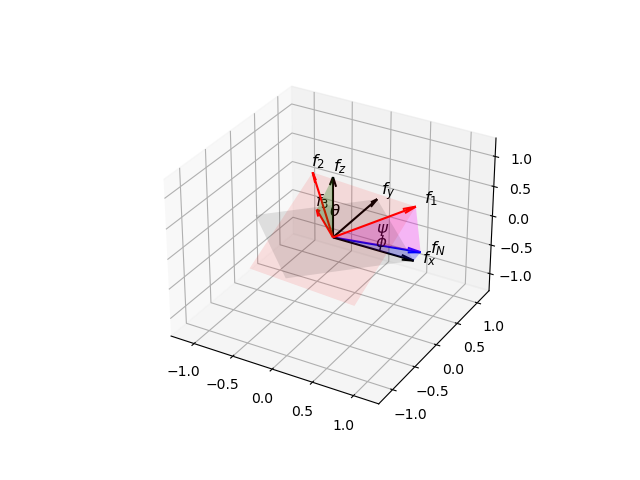

In [3]:
# transformation of frames
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

%matplotlib widget

fig = plt.figure(' ')
ax = plt.axes(projection="3d")    # set up for 3D work

fx = np.array([1,0,0])
fy = np.array([0,1,0])
fz = np.array([0,0,1])

F1 = ax.quiver([0,0,0],[0,0,0],[0,0,0],fx,fy,fz, colors='k', arrow_length_ratio=.15)

# create the e plane 
x = [fx[0], fy[0], -fx[0], -fy[0]]   
y = [fx[1], fy[1], -fx[1], -fy[1]]   
z = [fx[2], fy[2], -fx[2], -fy[2]]   
verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, facecolor = 'k', alpha = 0.1))

tfx = 1.1*fx
ax.text3D(tfx[0], tfx[1], tfx[2], '$f_x$', fontsize=12)
tfy = 1.1*fy
ax.text3D(tfy[0], tfy[1], tfy[2], '$f_y$', fontsize=12)
tfz = 1.1*fz
ax.text3D(tfz[0], tfz[1], tfz[2], '$f_z$', fontsize=12)

f1 = np.array([1,1,0.5])/np.sqrt(2.25)
f2 = np.array([-1,1,0.75])/np.sqrt(2+9/16)
f3 = np.cross(f1, f2)
f3 = f3 / np.linalg.norm(f3)

F2 = ax.quiver([0,0,0],[0,0,0],[0,0,0],
               [f1[0], f2[0], f3[0]],[f1[1], f2[1], f3[1]], [f1[2], f2[2], f3[2]], colors='r', arrow_length_ratio=.15)

# create the f plane 
x = [f1[0], f2[0], -f1[0], -f2[0]]   
y = [f1[1], f2[1], -f1[1], -f2[1]]   
z = [f1[2], f2[2], -f1[2], -f2[2]]   
verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, facecolor='r', alpha = 0.1))

tf1 = 1.1*f1
ax.text3D(tf1[0], tf1[1], tf1[2], '$f_1$', fontsize=12)
tf2 = 1.1*f2
ax.text3D(tf2[0], tf2[1], tf2[2], '$f_2$', fontsize=12)
tf3 = 1.1*f3
ax.text3D(tf3[0], tf3[1], tf3[2], '$f_3$', fontsize=12)

fN = np.cross(fz, f3)
fN = fN / np.linalg.norm(fN)
F3 = ax.quiver(0,0,0,fN[0], fN[1], fN[2], colors='b', arrow_length_ratio=.15)
tfN = 1.1*fN
ax.text3D(tfN[0], tfN[1], tfN[2], '$f_N$', fontsize=12)

# create the theta span
x = [0, f3[0], fz[0]]  
y = [0, f3[1], fz[1]]  
z = [0, f3[2], fz[2]]   
verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, facecolor = 'g', alpha = 0.25))
f3z = (f3 + fz)/4
ax.text3D(f3z[0], f3z[1], f3z[2], '$\\theta$', fontsize=12)

# create the phi span
x = [0, fx[0], fN[0]]  
y = [0, fx[1], fN[1]]  
z = [0, fx[2], fN[2]]   
verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, facecolors = 'b', alpha = 0.25))
f3z = (fx + fN)/4
ax.text3D(f3z[0], f3z[1], f3z[2], '$\phi$', fontsize=12)

# create the psi span
x = [0, f1[0], fN[0]]  
y = [0, f1[1], fN[1]]  
z = [0, f1[2], fN[2]]   
verts = [list(zip(x, y, z))]
ax.add_collection3d(Poly3DCollection(verts, facecolors = [1,0,1], alpha = 0.25))
f3z = (f1 + fN)/4
ax.text3D(f3z[0], f3z[1], f3z[2], '$\psi$', fontsize=12)

ax.set_xlim3d([-1.25, 1.25])
ax.set_ylim3d([-1.25, 1.25])
ax.set_zlim3d([-1.25, 1.25])
plt.show()

\begin{myfig}\label{fig:EulerAngles} Transformation of the given frame $(f_x, f_y, f_z)$ into the target frame $(f_1,f_2,f_3)$.
Please rotate and zoom to explore the three angles between the two frames. The black $(f_x,f_y)$ plane intersects the red $(f_1,f_2)$ plane along the blue
$f_N = f_z\times f_3/\Vert f_z\times f_3\Vert$ direction. We denote by $\phi$ the angle from $f_x$ to $f_N$ looking down $f_z$. We paint this span blue and note, as $f_x$ and $f_N$ lie in the black plane,  that

\begin{equation}\label{eq:EA1}
  f_N = K(f_z,\phi)f_x
\end{equation}

We next denote by $\theta$ the angle from $f_z$ to $f_3$ looking down $f_N$. We paint this span green and note that

\begin{equation}\label{eq:EA2}
  f_3 = K(f_N,\theta)f_z
\end{equation}

We finally denote by $\psi$ the angle from $f_N$ to $f_1$ looking down $f_3$. We paint this span purple and note, as $f_N$ and $f_1$ lie in the red plane, that

\begin{equation}\label{eq:EA3}
  f_1 = K(f_3,\psi)f_N
\end{equation}

\end{myfig}

We collect these individual rotations into the composite

\begin{equation}\label{eq:EATot}
  \cK \equiv K(f_3,\psi)K(f_N,\theta)K(f_z,\phi)
\end{equation}

and establish that $\cK$ indeed transforms $(f_x,f_y,f_z)$ to $(f_1,f_2,f_3)$.

\begin{exercise}\label{ex:EA0} (a) Please confirm that $\cK f_x=f_1$ and $\cK f_z = f_3$. 

(b) Please use $(AB)^T=B^TA^T$ and Exercise \ref{ex:Rot3a} to deduce that $\cK^T\cK = I$.

(c) Use (b) to show that  $\cK f_y$ is a unit vector perpendicular to **both** $f_1$ and $f_3$ and so can only be $f_2$ or $-f_2$. Use Proposition \ref{prop:frameOri} to rule out the latter option.

\end{exercise}

With (\ref{eq:EATot}) in hand we can now generalize Prop.\ref{prop:EPF} to a form needed in our study of quantum computation.

\begin{proposition}\label{prop:EPFgen} Given $a\in S^2$ and $\theta\in\maR$ and two orthogonal axes, $u,w\in S^2$, there exist angles $\alpha$, $\beta$, and $\gamma$ such that

\begin{equation}\label{eq:EPFgen0}
  K(a,\theta) = K(u,\gamma)K(w,\beta)K(u,\alpha)
\end{equation}

\end{proposition}

**Proof:** Complete the pair $(u,w)$ to an orthonormal frame $(u,v,w)$ and choose $\cK$ in (\ref{eq:EATot}) to be the rotation of $(u,v,w)$ to the standard frame $(e_x,e_y,e_z)$ and compose and expand

\begin{equation}\label{eq:EPFgen1}
  \cK K(a,\theta) \cK^{-1} = K(e_x,\gamma)K(e_z,\beta)K(e_x,\alpha)
\end{equation}

using Prop.\ref{prop:EPF}. Now unwrap and judicially interpose $\cK\cK^{-1}$ terms

\begin{equation}\label{eq:EPFgen2}
  K(a,\theta) = (\cK^{-1} K(e_x,\gamma)\cK)(\cK^{-1}K(e_z,\beta)\cK)(\cK^{-1}K(e_x,\alpha) \cK).
\end{equation}

To see that the first triple is rotation about $u$ it suffices to show that it fixes $u$. As $\cK u=e_x$ we find

\begin{equation}\label{eq:EPFgen3}
   \cK^{-1} K(e_x,\gamma)\cK u = \cK^{-1} K(e_x,\gamma)e_x = \cK^{-1} e_x = u,
\end{equation}

and it follows that $\cK^{-1} K(e_x,\gamma)\cK = K(u,\gamma)$ as similarity transforms do not change trace and so do not change angle of rotation. By the same token,
$\cK^{-1} K(e_x,\alpha)\cK = K(u,\alpha)$. Finally, as $\cK w = e_z$ it then follows that
$\cK^{-1} K(e_z,\beta)\cK = K(w,\beta)$. **End of Proof.**

For our work in kinematics we will need to automate the generation of the frame transformer in (\ref{eq:EATot}). The only nonstandard part of the calculation lies in computing the angles between two vectors while looking down a third vector. To quantify this we use the fact proven in the previous notebook that an orthonormal frame $(u,v,w)$ is right-handed if, and only if, $\det([u,v,w])>0$.

The code below implements this logic on random reference and target frames and prints the errors committed in reaching the target.

In [4]:
# frame-2-frame transformation. To keep the code clean and reusable we limit it to straight numerics
# You may wish to add visualization code that sweeps out the 3 individual rotations

import numpy as np

# make a random reference frame
fx = np.random.randn(3)
fx = fx / np.linalg.norm(fx)
fy = np.random.randn(3)
fy = fy - np.dot(fx,fy)*fx
fy = fy / np.linalg.norm(fy)
fz = np.cross(fx,fy)
fz = fz / np.linalg.norm(fz)

# make a random target frame
f1 = np.random.randn(3)
f1 = f1 / np.linalg.norm(f1)
f2 = np.random.randn(3)
f2 = f2 - np.dot(f1,f2)*f1  
f2 = f2 / np.linalg.norm(f2)
f3 = np.cross(f1,f2)       
f3 = f3 / np.linalg.norm(f3)

# build the frame transformer

fN = np.cross(fz,f3)
fN = fN / np.linalg.norm(fN)

ori1 = np.linalg.det(np.vstack((fx, fN, fz)))   # check orientation of this triple
phi = np.sign(ori1)*np.arccos(np.dot(fx, fN))  
fzO = np.outer(fz, fz)
Xfz = np.array([[0, -fz[2], fz[1]], [fz[2], 0, -fz[0]], [-fz[1], fz[0], 0]])
K1 = fzO + np.sin(phi)*Xfz + np.cos(phi)*(np.eye(3)-fzO)

ori2 = np.linalg.det(np.vstack((fz, f3, fN)))
theta = np.sign(ori2)*np.arccos(np.dot(fz, f3))
fNO = np.outer(fN, fN)
XfN = np.array([[0, -fN[2], fN[1]], [fN[2], 0, -fN[0]], [-fN[1], fN[0], 0]])
K2 = fNO + np.sin(theta)*XfN + np.cos(theta)*(np.eye(3)-fNO)

ori3 = np.linalg.det(np.vstack((fN, f1, f3)))
psi = np.sign(ori3)*np.arccos(np.dot(fN, f1))
f3O = np.outer(f3, f3)
Xf3 = np.array([[0, -f3[2], f3[1]], [f3[2], 0, -f3[0]], [-f3[1], f3[0], 0]])
K3 = f3O + np.sin(psi)*Xf3 + np.cos(psi)*(np.eye(3)-f3O)

K = K3@K2@K1
nf1 = K@fx     # the transformation of fx
nf2 = K@fy
nf3 = K@fz

print('error in f1 = ', np.linalg.norm(f1-nf1))    # determine whether nf1 is indeed f1
print('error in f2 = ', np.linalg.norm(f2-nf2))
print('error in f3 = ', np.linalg.norm(f3-nf3))

error in f1 =  3.4219371797089426e-16
error in f2 =  2.663125423296093e-16
error in f3 =  1.1796119636642288e-16


\begin{exercise}\label{ex:oframe}
Explain in words how this code constructs frames and why they are each orthonormal.
\end{exercise}

### The RQ Factorization

Our proof of the Euler Product Formula used simple rotations to zero out elements in matrix products. We apply this same idea to an arbitrary 3-by-3 matrix and arrive at a very useful factorization - that we will soon use to compute a camera's calibration matrix. 

\begin{proposition}\label{prop:RQ}
If $A$ is 3-by-3 then there exists a 3-by-3 upper triangular $R$ and a 3-by-3 rotation matrix $Q$ such that $A=RQ$. If $\det(A)>0$ then we may choose $R$ to have positive diagonal elements, and in this case $R$ and $Q$ are unique.
\end{proposition}

**Proof:** To begin, if $a_{2,1}\ne 0$ we form
\begin{equation}\label{eq:rq1}
 B\equiv AK(e_x,\alpha) = 
  \begin{bmatrix} a_{0,0} & a_{0,1} & a_{0,2} \\ a_{1,0} & a_{1,1} & a_{1,2} \\ a_{2,0} & a_{2,1} & a_{2,2} \end{bmatrix}
  \begin{bmatrix} 1 & 0 & 0 \\ 0 & \cos(\alpha) & -\sin(\alpha) \\  0 & \sin(\alpha) & \cos(\alpha)\end{bmatrix} 
   = \begin{bmatrix} a_{0,0} & b_{0,1} & b_{0,2} \\ a_{1,0} & b_{1,1} & b_{1,2} \\ 
                                          a_{2,0} & a_{2,1}\cos(\alpha) + a_{2,2}\sin(\alpha) & b_{2,2} \end{bmatrix}
\end{equation}

and choose $\alpha$ such that $b_{2,1}=0$. Next, if $b_{2,0}\ne 0$ we form

\begin{equation}\label{eq:rq2}
 C\equiv BK(e_y,\beta) = 
  \begin{bmatrix} a_{0,0} & b_{0,1} & b_{0,2} \\ a_{1,0} & b_{1,1} & b_{1,2} \\ 
                                          a_{2,0} & 0 & b_{2,2} \end{bmatrix}
  \begin{bmatrix} 
       \cos(\beta) & 0 & \sin(\beta) \\ 0 & 1 & 0 \\ -\sin(\beta) & 0 & \cos(\beta) \end{bmatrix} 
   = \begin{bmatrix} c_{0,0} & b_{0,1} & c_{0,2} \\ c_{1,0} & b_{1,1} & c_{1,2} \\ 
                                          a_{2,0}\cos(\beta) - b_{2,2}\sin(\beta) & 0 & c_{2,2} \end{bmatrix}
\end{equation}

and choose $\beta$ to make $c_{2,0}=0$ **and** $c_{2,2} > 0$. Finally, if $c_{1,0}\ne 0$ we form

\begin{equation}\label{eq:rq3}
 R\equiv CK(e_z,\gamma) = 
  \begin{bmatrix} c_{0,0} & b_{0,1} & c_{0,2} \\ c_{1,0} & b_{1,1} & c_{1,2} \\ 
                                          0 & 0 & c_{2,2} \end{bmatrix}
  \begin{bmatrix} 
       \cos(\gamma) & -\sin(\gamma) & 0 \\ \sin(\gamma) & \cos(\gamma) & 0 \\ 0 & 0 & 1 \end{bmatrix} 
   = \begin{bmatrix} r_{0,0} & r_{0,1} & c_{0,2} \\ c_{1,0}\cos(\gamma) + b_{1,1}\sin(\gamma) & r_{1,1} & c_{1,2} \\ 
                                          0 & 0 & c_{2,2} \end{bmatrix}
\end{equation}

We choose $\gamma$ to make $r_{1,0}=0$ **and** $r_{1,1}>0$ and arrive at the upper right triangular $R$. Retracing our steps we see

\begin{equation}\label{eq:Qpeel}
  R=CK(e_z,\gamma) = BK(e_y,\beta)K(e_z,\gamma) = AK(e_x,\alpha)K(e_y,\beta)K(e_z,\gamma)
\end{equation}

and so $A=RQ$ where $Q$ is the rotation matrix $Q=K(e_z,-\gamma)K(e_y,-\beta)K(e_x,-\alpha)$. 

Finally, as $\det(A)=\det(RQ)=\det(R)\det(Q)=r_{0,0}r_{1,1}c_{2,2}$ and $r_{1,1}$ and $c_{2,2}$ have been chosen positive it follows that $r_{0,0}$ has the same sign as $\det(A)$. 

Regarding uniqueness, if $A$ has the two factorizations $A=R_1Q_1=R_2Q_2$ and $\det(A)>0$ and $R_1$ and $R_2$ have positive diagonals then $R_2=R_1Q_1Q_2^T$. We note that the matrix $Q_1Q_2^T$ must also be upper right triangular. As it is also orthonormal it follows that it must in fact be diagonal with either three 1s or a one 1 and a pair of -1s. But this latter case is prohibited by the positive diagonals of $R_1$ and $R_2$.
**End of Proof.**

\begin{exercise}\label{ex:urt0}
Show that the determinant of a triangular matrix is the product of its diagonal elements.
\end{exercise}


\begin{exercise}\label{ex:urt1}
Show that if $R_2=R_1B$ where $R_2$ and $R_1$ are upper right triangular then so to is $B$.
\end{exercise}

\begin{exercise}\label{ex:urt2}
Show that if $B$ is are upper right triangular and orthonormal then $B$ diagonal.
\end{exercise}

We implement our RQ algorithm on random matrices (with positive determinant) in the code cell below.


In [65]:
# RQ factorization

import numpy as np

def rot(ind, ang):   # build a rotation matrix from axis index (0,1, or 2 for x,y, or z) and angle
    a = np.zeros(3)
    a[ind] = 1
    aO = np.outer(a, a)
    aX = np.array([[0, -a[2], a[1]], [a[2], 0, -a[0]], [-a[1], a[0], 0]])
    K = aO + np.sin(ang)*aX + np.cos(ang)*(np.eye(3)-aO)
    return K

A = np.random.normal(0, 1, (3,3))   # construct a random 3-by-3 matrix with positive determinant
if (np.linalg.det(A) < 0):
    A = -A
print("A = ", A)
print(" ")

alpha = np.arctan(-A[2,1]/A[2,2])   # find alpha
Kx = rot(0,alpha)
B = A@Kx

beta = np.arctan(A[2,0]/B[2,2])   # find beta
Ky = rot(1,beta)
C = B@Ky
if (C[2,2] < 0):                  # ensure that C[2,2] > 0
    Ky = rot(1,beta+np.pi)
    C = B@Ky

gamma = np.arctan(-C[1,0]/B[1,1])   # find gamma
Kz = rot(2,gamma)
R = C@Kz
if (R[1,1] < 0):                  # ensure that R[1,1] > 0
    Kz = rot(2,gamma+np.pi)
    R = C@Kz

print("R = ", R)                 # display the factors
print(" ")
Q = Kz.T@Ky.T@Kx.T
print("Q = ", Q)
print(" ")

print("||A-RQ|| = ", np.linalg.norm(A-R@Q))  # display the distance from A to RQ

A =  [[-0.12712479 -1.06605485 -2.80281204]
 [-0.33571002 -1.32161916  0.3942591 ]
 [-1.45252107  1.33976186  0.67423769]]
 
R =  [[ 2.58321993e+00 -2.88453047e-01 -1.50071937e+00]
 [-5.55111512e-16  1.33321676e+00 -4.87187591e-01]
 [-4.35014691e-17 -1.38887498e-16  2.08791182e+00]]
 
Q =  [[-0.5098717  -0.12441315 -0.85120633]
 [-0.5060222  -0.75681829  0.41372407]
 [-0.69568123  0.6416755   0.32292441]]
 
||A-RQ|| =  3.554447978966673e-16
